<a href="https://colab.research.google.com/github/SungmanKang/DataminingTeamProject/blob/Sun/Data_mining_group14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


In [3]:
#Reading Training data

X_data_train = pd.read_csv('DM_dataset.csv')
#X_data_train_labels = pd.read_csv('DM_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)

X_data_train.drop('Year', inplace=True, axis=1)
X_data_train.drop('Month', inplace=True, axis=1)
X_data_train.drop('Day', inplace=True, axis=1)

X_data_train
#X_data_train.head()

,Temp_Max,Temp_Avg,Temp_Min,DP_Max,DP_Avg,DP_Min,Hu_Max,Hu_Avg,Hu_Min,WS_Max,WS_Avg,WS_Min,Pres_Max,Pres_Avg,Pres_Min,Preci_Total
0,74,66.6,53,65,59.0,44,93,78.0,44,22,12.0,5,29.4,29.3,29.2,0.46
1,58,49.3,41,44,39.6,35,86,70.0,51,15,7.3,0,29.4,29.4,29.3,0.14
2,54,43.6,35,33,31.7,30,85,64.1,40,13,5.8,0,29.5,29.4,29.4,0.00
3,60,47.3,32,43,36.8,29,89,69.0,45,13,4.4,0,29.5,29.4,29.3,0.00
4,53,43.9,36,42,38.0,29,96,81.0,50,13,4.7,0,29.5,29.4,29.3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,63,59.8,53,57,53.1,46,90,78.8,65,9,4.0,0,29.6,29.5,29.5,0.00
1093,67,63.3,57,62,59.0,54,93,86.0,78,13,7.2,0,29.5,29.4,29.3,0.00
1094,71,67.5,58,66,63.9,53,96,88.1,76,23,11.5,5,29.3,29.2,29.0,0.00
1095,56,50.1,43,49,39.3,33,86,68.2,42,14,10.6,7,29.4,29.3,29.2,0.55


In [ ]:
Standardized_X_train = StandardScaler().fit_transform(X_data_train)
Standardized_X_train

Variance Explained by first component 0.39655195858341885
Variance Explained by second component 0.19236936862873852
Variance Explained by third component 0.11165910027599239


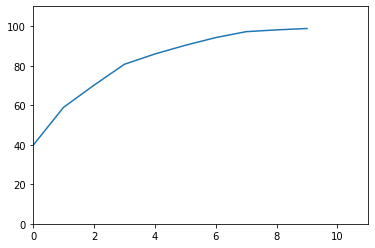

In [5]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(Standardized_X_train)
principalComponents
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)


plt.ylim(0,110)
plt.xlim(0,11)
# plt.style.context('seaborn-whitegrid')

print('Variance Explained by first component', variance[0])
print('Variance Explained by second component', variance[1])
print('Variance Explained by third component', variance[2])
plt.plot(var)

In [6]:
Y_train = X_data_train[['Temp_Avg']]
Y_train

reg = linear_model.LinearRegression()
reg.fit(X_data_train, Y_train)

print('Coefficients: \n', reg.coef_)


Coefficients: 
 [[-9.99634883e-16  1.00000000e+00 -2.77555756e-16  2.22044605e-16
  -5.55111512e-16  2.22044605e-16 -8.89316832e-17  2.70616862e-16
  -1.90819582e-17 -5.41233725e-16  6.24500451e-16  3.12250226e-17
  -2.31412112e-15  1.51224519e-15 -4.67507977e-16 -2.09359440e-16]]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data_train, Y_train, test_size = 0.1, random_state = 0)


In [36]:
from sklearn import linear_model
from sklearn import svm
classifier = svm.SVR()
#classifier = linear_model.SGDRegressor()
#classifier = linear_model.BayesianRidge()
#classifier = linear_model.LassoLars()
#classifier = linear_model.ARDRegression()
#classifier = linear_model.PassiveAggressiveRegressor()
#classifier = linear_model.TheilSenRegressor()
#classifier = linear_model.LinearRegression
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mse)
print(evs)


1.3118902884119392
0.9927629497695949


Text(0, 0.5, 'Predicted response')

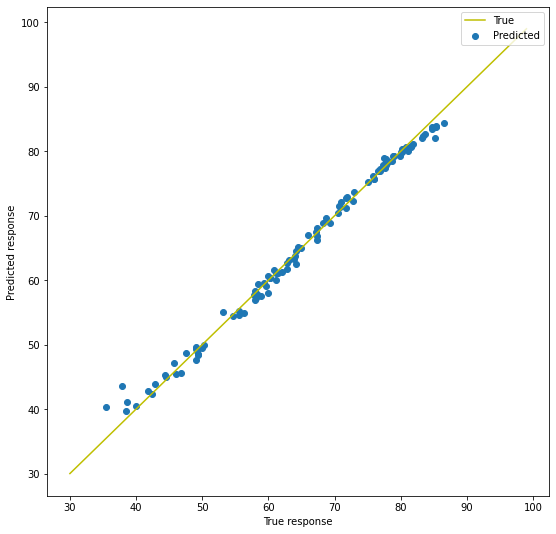

In [38]:
xx = list(range(30,100))

plt.subplots(figsize =(9, 9))
plt.scatter(y_test, y_pred,label='Predicted')
plt.plot(xx,xx,c='y', label='True')

plt.legend(loc="upper right")
plt.xlabel('True response')
plt.ylabel('Predicted response')


Temp_Max           AxesSubplot(0.125,0.71587;0.168478x0.16413)
Temp_Min        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
DP_Max          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
DP_Avg          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
DP_Min            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Hu_Max         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Hu_Min         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
WS_Max         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
WS_Avg            AxesSubplot(0.125,0.321957;0.168478x0.16413)
WS_Min         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Pres_Max       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Pres_Avg       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Pres_Min             AxesSubplot(0.125,0.125;0.168478x0.16413)
Preci_Total       AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

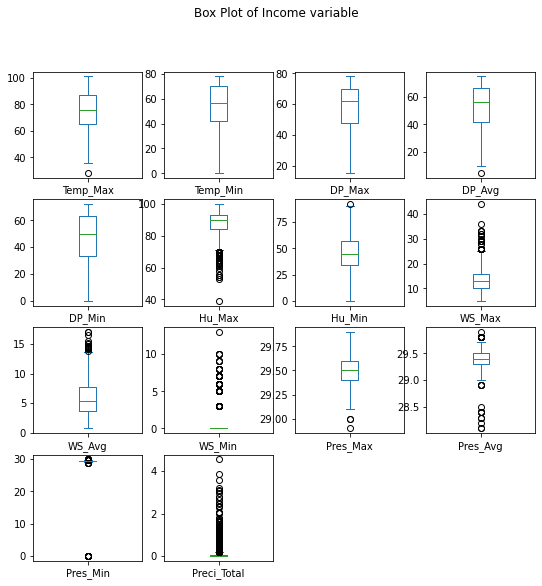

In [41]:
#plt.figure(figsize=(7,7))
#ax = sns.boxplot(y="Temp_Avg",x='Hu_Avg', data=X_data_train)

X_data_train.drop(['Temp_Avg','Hu_Avg'],axis = 1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of Income variable')

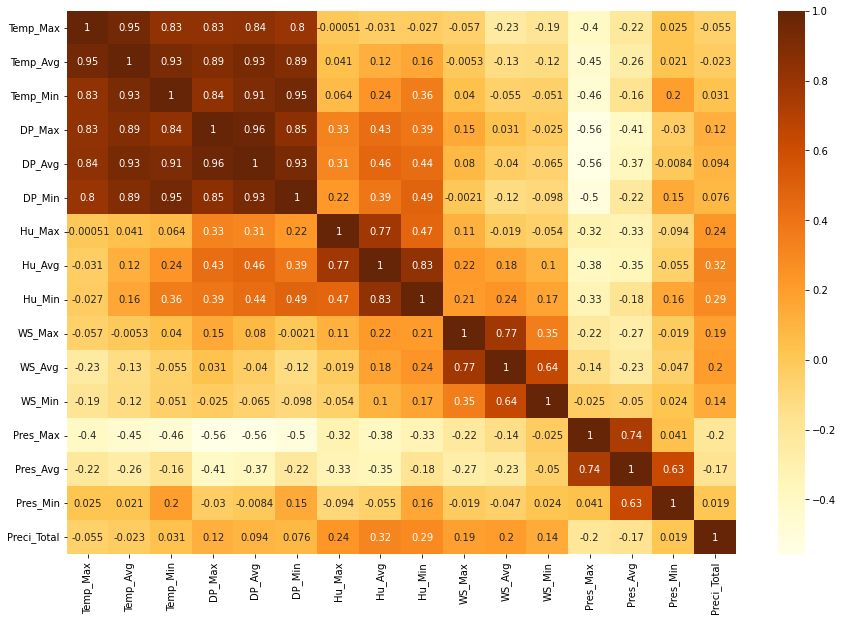

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_data_train.corr(),annot=True,cmap = 'YlOrBr')

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd "/content/drive/My Drive/DataMining"

/content/drive/My Drive/DataMining


In [5]:
!git clone https://github.com/zyixin17/Data_mining.git

Cloning into 'Data_mining'...
fatal: could not read Username for 'https://github.com': No such device or address
